<a href="https://colab.research.google.com/github/hyung6370/Univ.AI/blob/main/P11_Mnist_CNN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
# 시퀀스 모델.
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(4, 4), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

############  Try to change the NN structure and parameters #####################

# model = Sequential()

# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(32, kernel_size=(4, 4), activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
####################################################################################

# 출력 Feature Map 하나의 shape -> 3차원 (h, w, c)
# 3차원 -> 1차원
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 3, 3, 128)      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
start_time = datetime.now()

hist = model.fit(x_train, y_train,
                 batch_size=128, epochs=10, verbose=1, 
                 validation_data=(x_test, y_test))
print("\nTraining time = ", datetime.now() - start_time) 

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2049 - accuracy: 0.9354 - val_loss: 0.0537 - val_accuracy: 0.9826
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0443 - accuracy: 0.9862 - val_loss: 0.0415 - val_accuracy: 0.9860
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0323 - val_accuracy: 0.9890
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0242 - accuracy: 0.9922 - val_loss: 0.0338 - val_accuracy: 0.9891
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0181 - accuracy: 0.9944 - val_loss: 0.0228 - val_accuracy: 0.9928
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0153 - accuracy: 0.9950 - val_loss: 0.0247 - val_accuracy: 0.9926
Epoch 7/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0136 - accuracy: 0.9955 - val_loss: 0.0282 - val_accuracy: 0.9911
Epoch 

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='Train loss')
  plt.plot(history.history['val_loss'], label='Validation loss')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

In [ ]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='Train accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation accuracy')
  plt.title('Answer')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()

Test loss: 0.02558060549199581


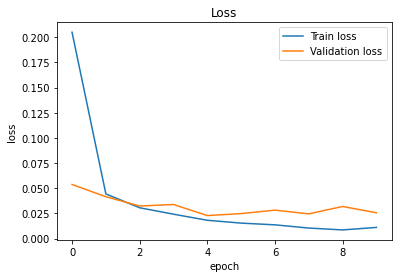


Test accuracy: 0.9922999739646912


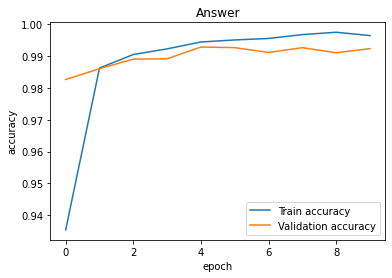

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
plot_loss(hist)
print()
print('Test accuracy:', score[1])
plot_accuracy(hist)

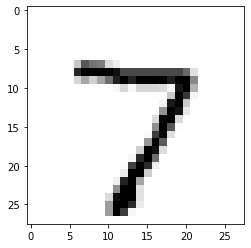

The Answer is  7


In [ ]:
t = 0    # t번째 테스트 이미지
plt.imshow(x_test[t].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', np.argmax(model.predict(x_test[t:t+1])))

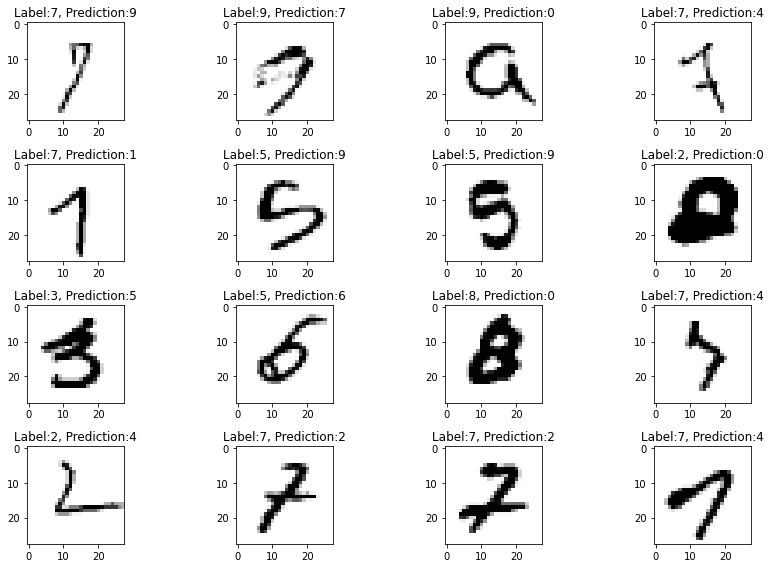

In [ ]:
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
test_labels = np.argmax(y_test, axis=1)

wrong_result = []
for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = np.random.choice(wrong_result, 16,  replace=False)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()